# 회귀분석 7장 연습문제R
> 연습문제 7-1,7,10 R 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["R", "회귀분석"]

# 3.7자료 해석

In [1]:
x <- c(4.2,3.8,4.8,3.4,4.5,4.6,4.3,3.7,3.9)
y <- c(2.8,2.5,3.1,2.1,2.9,2.6,2.4,2.4,2.5)
lm37 <- lm(y~x)

In [2]:
coef(lm37)

(Intercept)           x 
  0.3459948   0.5426357

$\to X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix} ,
\beta = \begin{bmatrix}
0.346 \\\\
0.543
\end{bmatrix}$ 

# 7.1
>연습문제 3.7의 자료로부터 다음을 구하여라.

### 1) $X'X$

$X'X$ = $ \begin{bmatrix}
n & \sum_{}^{}x_i \\\\
\sum_{}^{}x_i & \sum_{}^{}{x_i}^2
\end{bmatrix}$ 

*n* , $\sum_{}^{}x_i$ , $\sum_{}^{}{x_i}^2$

In [3]:
n <- length(x)
sx <- sum(x)
sxs <- sum(x^2)
c(n,sx,sxs)

[1]   9.00  37.20 155.48

$\to X'X = \begin{bmatrix}
9 & 37.2 \\\\
37.2 & 155.48
\end{bmatrix}$

### 2) $(X'X)^{-1}$

 $(X'X)^{-1}$ = $ \frac{1}{n\sum_{}^{}{x_i}^2 - (\sum_{}^{}x_i)^2} $ $\begin{bmatrix}
\sum_{}^{}{x_i}^2 & -\sum_{}^{}x_i \\\\
-\sum_{}^{}x_i & n
\end{bmatrix}$ 

`-` $ \frac{1}{n\sum_{}^{}{x_i}^2 - (\sum_{}^{}x_i)^2} $ 계산

In [4]:
M <- 1/(n*sxs-(sx)^2)
M

[1] 0.06459948

$\sum_{}^{}{x_i}^2 , -\sum_{}^{}x_i , n$

In [5]:
c(sxs*M,-1*sx*M,n*M)

[1] 10.0439276 -2.4031008  0.5813953

 $ \to (X'X)^{-1} = \begin{bmatrix}
10.04 & -2.403 \\\\
-2.403 & 0.581
\end{bmatrix} $

### 3) $X'Y$

$X'Y$ = $\begin{bmatrix}
\sum_{}^{}y_i \\\\
\sum_{}^{}x_iy_i
\end{bmatrix} $

$ \sum_{}^{}y_i , \sum_{}^{}x_iy_i $

In [6]:
sy <- sum(y)
sxy <- sum(x*y)
c(sy,sxy)

[1] 23.30 97.24

$\to X'Y$ = $\begin{bmatrix}
23.3 \\\\
97.24
\end{bmatrix} $

### 4) $(X'X)^{-1}X'Y$

 $(X'X)^{-1}X'Y$ = $\begin{bmatrix}
\frac{(sxs*sy -sx*sxy)}{n*sxs-sx^2}\\\\
\frac{n*sxy - sx*sy}{n*sxs - sx^2}
\end{bmatrix} $

In [7]:
10.04*23.3-2.403*97.24

[1] 0.26428

In [8]:
(-2.403*23.3)+(0.581*97.24)

[1] 0.50654

In [9]:
A = matrix(c(10.04,-2.403,-2.403,0.581),2,2)  #(X'X)^-1
B = matrix(c(23.3,97.24),2,1)            #X'Y
print(A)
print(B)

       [,1]   [,2]
[1,] 10.040 -2.403
[2,] -2.403  0.581
      [,1]
[1,] 23.30
[2,] 97.24


In [10]:
A %*% B

0.26428
0.50654


 $\to (X'X)^{-1}X'Y$ = $\begin{bmatrix}
0.26428 \\\\
0.50654
\end{bmatrix} $

____________________________

# 7.7
> 어린이들의 체중($y$ : 파운드)이 신장($x_1$:인치)가 연령($x_2$:살)에 다라 어떻게 영향을 받는지 파악하기 위해 12명의 어린이로부터 다음의 자료를 얻었다.

|범주|값||||||||||||
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|$y$|64|71|53|67|55|58|77|57|56|51|76|68|
|$x_1$|57|59|49|62|51|50|55|48|42|42|61|57|
|$x_2$|8|10|6|11|8|7|10|9|10|6|12|9|

### 1) $x_1$에 대한 $y$ / $x_2$에 대한 $y$ / $x_1$에 대한 $x_2$ 의 산점도를 그리고, 각각의 상관계수 $r_{x_1y},r_{x_2y},r_{x_1x_2}$를 구하여라.

In [11]:
y <- c(64,71,53,67,55,58,77,57,56,51,76,68)
x1 <- c(57,59,49,62,51,50,55,48,42,42,61,57)
x2 <- c(8,10,6,11,8,7,10,9,10,6,12,9)

$x_1$에 대한 $y$ / $x_2$에 대한 $y$ / $x_1$에 대한 $x_2$

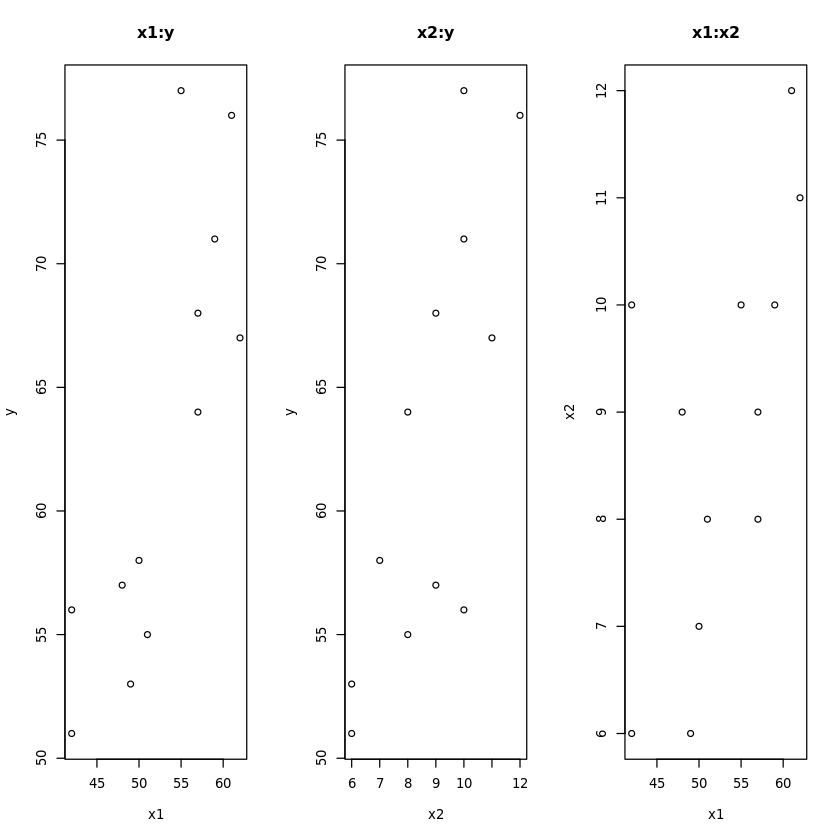

In [12]:
par(mfrow=c(1,3))
plot(x1,y,main="x1:y")
plot(x2,y,main="x2:y")
plot(x1,x2,main="x1:x2")

상관계수 구하기

In [13]:
lmx1y <- lm(y~x1)
lmx2y <- lm(y~x2)
lmx1x2 <- lm(x2~x1)

In [14]:
cor(x1,y)
cor(x2,y)
cor(x1,x2)

[1] 0.8142569

[1] 0.7698168

[1] 0.6138386

$x_1$에 대한 $y$ 의 상관계수,$r_{x_1y}: 0.8143$

$x_2$에 대한 $y$ 의 상관계수,$r_{x_2y}: 0.7698$

$x_1$에 대한 $x_2$ 의 상관계수,$r_{x_1x_2}: 0.6138$

### 2) $y= \beta_0 + \beta_1x_1+\epsilon$을 가정하고 회귀계수와 잔차제곱합을 구하여라.

회귀계수

In [15]:
coef(lmx1y)

(Intercept)          x1 
   6.189849    1.072230

$\to \beta_0 = 6.19 , \beta_1 = 1.072 $

잔차제곱합

In [16]:
sum((y-(6.19 + 1.072*x1))^2)

[1] 299.3292

### 3) $y= \beta_0 + \beta_2x_2+\epsilon$을 가정하고 회귀계수와 잔차제곱합을 구하여라.

회귀계수

In [17]:
coef(lmx2y)

(Intercept)          x2 
  30.571429    3.642857

$\to \beta_0 = 30.57 , \beta_2 = 3.643 $

잔차제곱합

In [18]:
sum((y-(30.57 + 3.643*x2))^2)

[1] 361.8571

### 4) $y= \beta_0 + \beta_1x_1+\beta_2x_2+\epsilon$을 가정하고 회귀계수와 잔차제곱합을 구하여라.

In [19]:
lmyx1x2 <- lm(y~x1+x2)

회귀계수

In [20]:
coef(lmyx1x2)

(Intercept)          x1          x2 
   6.553048    0.722038    2.050126

$\to \beta_0 = 6.553 , \beta_1 = 0.722, \beta_2 = 2.05 $

잔차제곱합

In [21]:
sum((y-(6.553 + 0.722*x1 + 2.05*x2 ))^2)

[1] 195.4275

### 5) 3개 모형의 잔차제곱합을 비교하고 그 결과에 대해 논의하여라

중회귀모형의 잔차제곱합이 $195.43$으로 가장 작다. 이것은 $x_1,x_2$이 서로 연관이 있고, 이때의 $y$가 제일 잘 적합됐다는 뜻으로 해석 할 수 있다.  

___________________________________

# 7.10
>다음 주어진 자료에 대하여

|범주|값|||||||||||
|---|---|---|---|---|---|---|---|---|---|---|---|
|$y$|6|8|1|0|5|3|2|-4|10|-3|5|
|$x_1$|1|4|9|11|3|8|5|10|2|7|6|
|$x_2$|8|2|-8|-10|6|-6|0|-12|4|-2|-4|

### 1) 중선형회귀모형 $y = \beta_0 + \beta_1x_1+\beta_2x_2+\epsilon$을 가정하고 회귀선을 추정하여라.

In [22]:
y <- c(6,8,1,0,5,3,2,-4,10,-3,5)
x1 <- c(1,4,9,11,3,8,5,10,2,7,6)
x2 <- c(8,2,-8,-10,6,-6,0,-12,4,-2,-4)

In [23]:
lm710 <- lm(y ~ x1+x2)

In [24]:
coef(lm710)

(Intercept)          x1          x2 
       14.0        -2.0        -0.5

$\beta_0 = 14 , \beta_1 = -2 , \beta_2 = -0.5 $

### 2) $\sigma^2$의 불편추정량 $MSE$를 구하고 추정된 $MSE$값을 이용하여

In [25]:
anova(lm710)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,116.081818,116.081818,13.6566845,0.006081901
x2,1,5.918182,5.918182,0.6962567,0.428255902
Residuals,8,68.000000,8.500000,NA,NA


$MSE = 8.5$

#### (1) $Var(b_1), Var(b_2)$를 각각 추정하여라.

In [26]:
X <- matrix(c(1,1,1,1,1,1,1,1,1,1,1,array(x1),array(x2)),11,3)
B <- matrix(c(14,-2,-0.5),3,1)
Y <- matrix(y,11,1)

In [27]:
XtX <- t(X) %*% X  #[X'X]
XtX

11,66,-22
66,506,-346
-22,-346,484


In [32]:
XtXr <- solve(XtX)  # [X'X]의 역함수
XtXr

4.3704790,-0.84946237,-0.40860215
-0.8494624,0.16897081,0.08218126
-0.4086022,0.08218126,0.04224270


In [33]:
(XtXr)* (8.5^2)  # [(X'X)^-1]*(MSE^2) = Var(b)

315.76711,-61.373656,-29.521505
-61.37366,12.208141,5.937596
-29.52151,5.937596,3.052035


$Var(b_1) : [(X'X)^{-1}]*(MSE^2)$ 의 대각 2번째 원소
>12.21

$Var(b_2) : [(X'X)^{-1}]*(MSE^2)$ 의 대각 3번째 원소
>3.05

#### (2) $x_1 =3, x_2=5$일 때 $y$의 예측값의 분산을 구하여라.

In [34]:
14-2*3-0.5*5  #y의 예측값

[1] 5.5

In [35]:
sum((5.5-mean(14-2*x1-0.5*x2))^2)

[1] 6.25

$𝑦$ 의 예측값의 분산 : 6.25